In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
import pandas as pd
import scipy.constants as co
import scipy.stats as ss
import itertools
import pickle
from scipy import signal

In [2]:
th232_chain = pd.read_csv("data/raw_sources_IO/Th232_summary_1ppb.txt", skiprows=1, engine='python', names=['Energy','a,n','S.F.','Total'], \
                         delim_whitespace=True)
print (th232_chain.head(10))

th232_chain_hang = pd.read_csv("data/raw_sources_IO/Th232_Hang_summary_1ppb.txt", skiprows=1, engine='python', names=['Energy','a,n','S.F.','Total'], \
                         delim_whitespace=True)
print (th232_chain_hang.head(10))


   Energy           a,n          S.F.         Total
0    10.0  6.490000e-16  1.576000e-19  6.491000e-16
1     9.9  7.167000e-16  1.779000e-19  7.169000e-16
2     9.8  7.884000e-16  2.019000e-19  7.887000e-16
3     9.7  8.633000e-16  2.289000e-19  8.635000e-16
4     9.6  9.409000e-16  2.575000e-19  9.411000e-16
5     9.5  1.021000e-15  2.922000e-19  1.021000e-15
6     9.4  1.140000e-15  3.291000e-19  1.141000e-15
7     9.2  1.851000e-15  4.207000e-19  1.852000e-15
8     9.1  2.290000e-15  4.753000e-19  2.291000e-15
9     9.0  2.747000e-15  5.364000e-19  2.747000e-15
   Energy           a,n          S.F.         Total
0    10.0  1.369000e-14  1.576000e-19  1.369000e-14
1     9.9  1.512000e-14  1.779000e-19  1.512000e-14
2     9.8  1.663000e-14  2.019000e-19  1.663000e-14
3     9.7  1.821000e-14  2.289000e-19  1.821000e-14
4     9.6  1.984000e-14  2.575000e-19  1.984000e-14
5     9.5  2.153000e-14  2.922000e-19  2.153000e-14
6     9.4  2.405000e-14  3.291000e-19  2.405000e-14
7     9.2  3

/var/folders/qs/y0dxxqrn4rd_pc96p6hnq51w0000gn/T/ipykernel_92453/3101864980.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  th232_chain = pd.read_csv("data/raw_sources_IO/Th232_summary_1ppb.txt", skiprows=1, engine='python', names=['Energy','a,n','S.F.','Total'], \
/var/folders/qs/y0dxxqrn4rd_pc96p6hnq51w0000gn/T/ipykernel_92453/3101864980.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  th232_chain_hang = pd.read_csv("data/raw_sources_IO/Th232_Hang_summary_1ppb.txt", skiprows=1, engine='python', names=['Energy','a,n','S.F.','Total'], \


In [3]:
th232_hang = pd.read_csv("data/raw_sources_IO/Hang_S4_Th.txt", skiprows=1, engine='python', names=['Energy','Total'], \
                         delim_whitespace=False)
print (th232_hang.head(10))

   Energy         Total
0  0.0161  1.612900e-09
1  0.0241  1.612800e-09
2  0.0241  1.601300e-09
3  0.0241  1.589800e-09
4  0.0241  1.578300e-09
5  0.0241  1.566800e-09
6  0.0241  1.555200e-09
7  0.0241  1.543700e-09
8  0.0241  1.532200e-09
9  0.0161  1.532200e-09


/var/folders/qs/y0dxxqrn4rd_pc96p6hnq51w0000gn/T/ipykernel_92453/2598035741.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  th232_hang = pd.read_csv("data/raw_sources_IO/Hang_S4_Th.txt", skiprows=1, engine='python', names=['Energy','Total'], \


In [4]:
th232chainEn = np.asarray(th232_chain['Energy'],dtype=float)
th232chainRn = np.asarray(th232_chain['Total'],dtype=float)
th232chainANRn = np.asarray(th232_chain['a,n'],dtype=float)
th232chainEn_HangRetry = np.asarray(th232_chain_hang['Energy'],dtype=float)
th232chainRn_HangRetry = np.asarray(th232_chain_hang['Total'],dtype=float)
th232chainANRn_HangRetry = np.asarray(th232_chain_hang['a,n'],dtype=float)
th232hangEn = np.asarray(th232_hang['Energy'],dtype=float)
th232hangRn = np.asarray(th232_hang['Total'],dtype=float)



print(np.shape(th232chainEn))
print(np.shape(th232chainRn))

(87,)
(87,)


[6.491e-16 7.169e-16 7.887e-16 8.635e-16 9.411e-16 1.021e-15 1.141e-15
 1.852e-15 2.291e-15 2.747e-15 3.237e-15 3.800e-15 4.457e-15 5.109e-15
 6.762e-15 7.630e-15 8.590e-15 9.633e-15 1.070e-14 1.188e-14 1.309e-14
 1.575e-14 1.740e-14 1.950e-14 2.179e-14 2.457e-14 2.764e-14 3.069e-14
 4.004e-14 4.527e-14 5.074e-14 5.671e-14 6.321e-14 7.053e-14 7.794e-14
 9.505e-14 1.045e-13 1.145e-13 1.295e-13 1.465e-13 1.635e-13 1.813e-13
 2.393e-13 2.710e-13 3.065e-13 3.487e-13 3.996e-13 4.561e-13 5.168e-13
 6.619e-13 7.459e-13 8.421e-13 9.468e-13 1.041e-12 1.151e-12 1.262e-12
 1.522e-12 1.655e-12 1.787e-12 1.937e-12 2.080e-12 2.210e-12 2.366e-12
 2.759e-12 2.965e-12 3.192e-12 3.413e-12 3.658e-12 3.903e-12 4.164e-12
 4.682e-12 4.898e-12 5.098e-12 5.298e-12 5.462e-12 5.615e-12 5.731e-12
 5.818e-12 5.825e-12 5.858e-12 5.883e-12 5.851e-12 5.771e-12 5.633e-12
 4.788e-12 3.977e-12 2.921e-12]
0.09999999999999964


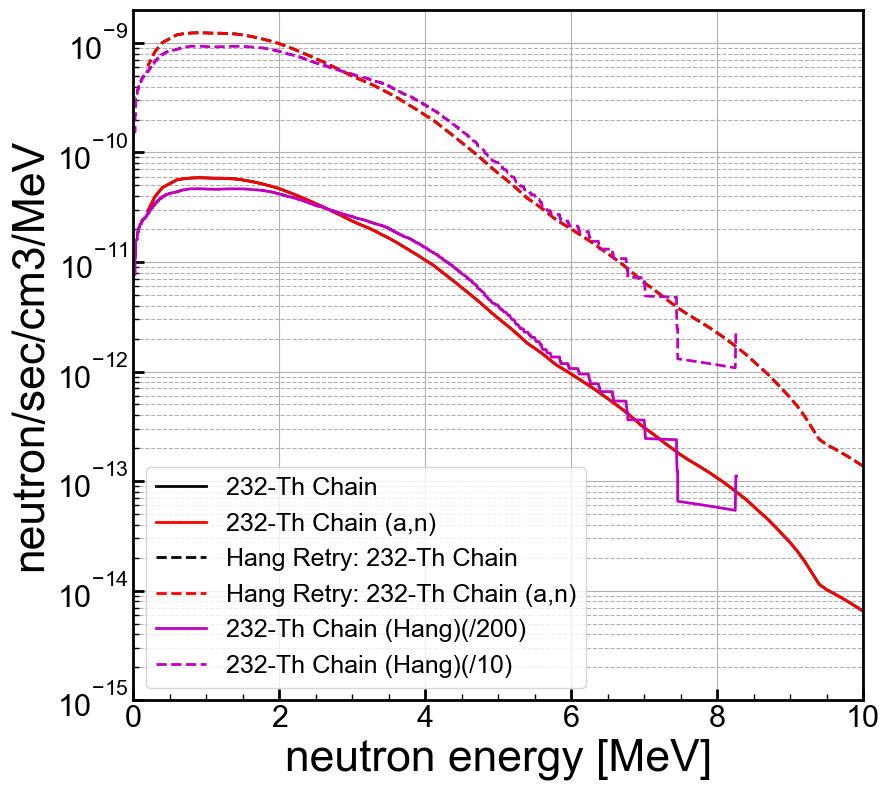

In [5]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

print(th232chainRn)

width=np.abs(np.diff(th232chainEn)[0])
widthH=np.abs(np.diff(th232hangEn)[0])
widthHR=np.abs(np.diff(th232chainEn_HangRetry)[0])

print(width)



ax1.plot(th232chainEn, th232chainRn/width,color='k',linestyle='-',label="232-Th Chain")
ax1.plot(th232chainEn, th232chainANRn/width,color='r',linestyle='-',label="232-Th Chain (a,n)")
ax1.plot(th232chainEn, th232chainRn_HangRetry/width,color='k',linestyle='--',label="Hang Retry: 232-Th Chain")
ax1.plot(th232chainEn, th232chainANRn_HangRetry/width,color='r',linestyle='--',label="Hang Retry: 232-Th Chain (a,n)")
ax1.plot(th232hangEn, th232hangRn/200,color='m',linestyle='-',label="232-Th Chain (Hang)(/200)")
ax1.plot(th232hangEn, th232hangRn/10,color='m',linestyle='--',label="232-Th Chain (Hang)(/10)")


#ax1.plot(Eplot, 100*er_res(Eplot),color='b',label="$\sigma$ (n,p) (%)")


ymin = 1e-15
ymax = 2e-9


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 10) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('neutron/sec/cm3/MeV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=3,prop={'size':18})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [6]:
u238_chain = pd.read_csv("data/raw_sources_IO/U238_summary_1ppb.txt", skiprows=1, engine='python', names=['Energy','a,n','S.F.','Total'], \
                         delim_whitespace=True)
print (u238_chain.head(10))

u235_chain = pd.read_csv("data/raw_sources_IO/U235_summary_1ppb.txt", skiprows=1, engine='python', names=['Energy','a,n','S.F.','Total'], \
                         delim_whitespace=True)
print (u235_chain.head(10))

   Energy           a,n          S.F.         Total
0    10.0  5.697000e-16  3.821000e-14  3.878000e-14
1     9.9  8.896000e-16  4.270000e-14  4.359000e-14
2     9.8  1.226000e-15  4.778000e-14  4.901000e-14
3     9.7  1.573000e-15  5.348000e-14  5.505000e-14
4     9.6  1.932000e-15  5.985000e-14  6.178000e-14
5     9.5  2.318000e-15  6.683000e-14  6.915000e-14
6     9.4  2.717000e-15  7.489000e-14  7.761000e-14
7     9.2  3.551000e-15  9.351000e-14  9.706000e-14
8     9.1  3.985000e-15  1.044000e-13  1.084000e-13
9     9.0  4.432000e-15  1.167000e-13  1.211000e-13
   Energy           a,n          S.F.         Total
0    10.0  9.326000e-15  3.000000e-15  1.233000e-14
1     9.9  1.281000e-14  3.295000e-15  1.611000e-14
2     9.8  1.899000e-14  3.620000e-15  2.261000e-14
3     9.7  2.569000e-14  3.976000e-15  2.967000e-14
4     9.6  3.262000e-14  4.366000e-15  3.699000e-14
5     9.5  3.982000e-14  4.791000e-15  4.461000e-14
6     9.4  4.720000e-14  5.261000e-15  5.247000e-14
7     9.2  6

/var/folders/qs/y0dxxqrn4rd_pc96p6hnq51w0000gn/T/ipykernel_92453/1251044759.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  u238_chain = pd.read_csv("data/raw_sources_IO/U238_summary_1ppb.txt", skiprows=1, engine='python', names=['Energy','a,n','S.F.','Total'], \
/var/folders/qs/y0dxxqrn4rd_pc96p6hnq51w0000gn/T/ipykernel_92453/1251044759.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  u235_chain = pd.read_csv("data/raw_sources_IO/U235_summary_1ppb.txt", skiprows=1, engine='python', names=['Energy','a,n','S.F.','Total'], \


In [7]:
UAN_hang = pd.read_csv("data/raw_sources_IO/Hang_S4_UAN.txt", skiprows=1, engine='python', names=['Energy','Total'], \
                         delim_whitespace=False)
print (UAN_hang.head(10))

USF_hang = pd.read_csv("data/raw_sources_IO/Hang_S4_USF.txt", skiprows=1, engine='python', names=['Energy','Total'], \
                         delim_whitespace=False)
print (USF_hang.head(10))

   Energy         Total
0  0.0522  7.043000e-12
1  0.0596  7.043000e-12
2  0.0596  6.989200e-12
3  0.0596  6.935500e-12
4  0.0596  6.881700e-12
5  0.0596  6.828000e-12
6  0.0596  6.774200e-12
7  0.0596  6.720400e-12
8  0.0596  6.666700e-12
9  0.0596  6.612900e-12
   Energy         Total
0  0.0671  5.860200e-12
1  0.0746  5.860200e-12
2  0.0820  5.860200e-12
3  0.0746  5.806500e-12
4  0.0746  5.752700e-12
5  0.0746  5.698900e-12
6  0.0746  5.645200e-12
7  0.0671  5.645200e-12
8  0.0671  5.698900e-12
9  0.0671  5.752700e-12


/var/folders/qs/y0dxxqrn4rd_pc96p6hnq51w0000gn/T/ipykernel_92453/2870134199.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  UAN_hang = pd.read_csv("data/raw_sources_IO/Hang_S4_UAN.txt", skiprows=1, engine='python', names=['Energy','Total'], \
/var/folders/qs/y0dxxqrn4rd_pc96p6hnq51w0000gn/T/ipykernel_92453/2870134199.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  USF_hang = pd.read_csv("data/raw_sources_IO/Hang_S4_USF.txt", skiprows=1, engine='python', names=['Energy','Total'], \


In [8]:
u238chainEn = np.asarray(u238_chain['Energy'],dtype=float)
u238chainRn = np.asarray(u238_chain['Total'],dtype=float)
u238chainANRn = np.asarray(u238_chain['a,n'],dtype=float)
u238chainSFRn = np.asarray(u238_chain['S.F.'],dtype=float)

u235chainEn = np.asarray(u235_chain['Energy'],dtype=float)
u235chainRn = np.asarray(u235_chain['Total'],dtype=float)
u235chainANRn = np.asarray(u235_chain['a,n'],dtype=float)
u235chainSFRn = np.asarray(u235_chain['S.F.'],dtype=float)

uANhangEn = np.asarray(UAN_hang['Energy'],dtype=float)
uANhangRn = np.asarray(UAN_hang['Total'],dtype=float)

uSFhangEn = np.asarray(USF_hang['Energy'],dtype=float)
uSFhangRn = np.asarray(USF_hang['Total'],dtype=float)


print(np.shape(u238chainEn))
print(np.shape(u238chainRn))

(87,)
(87,)


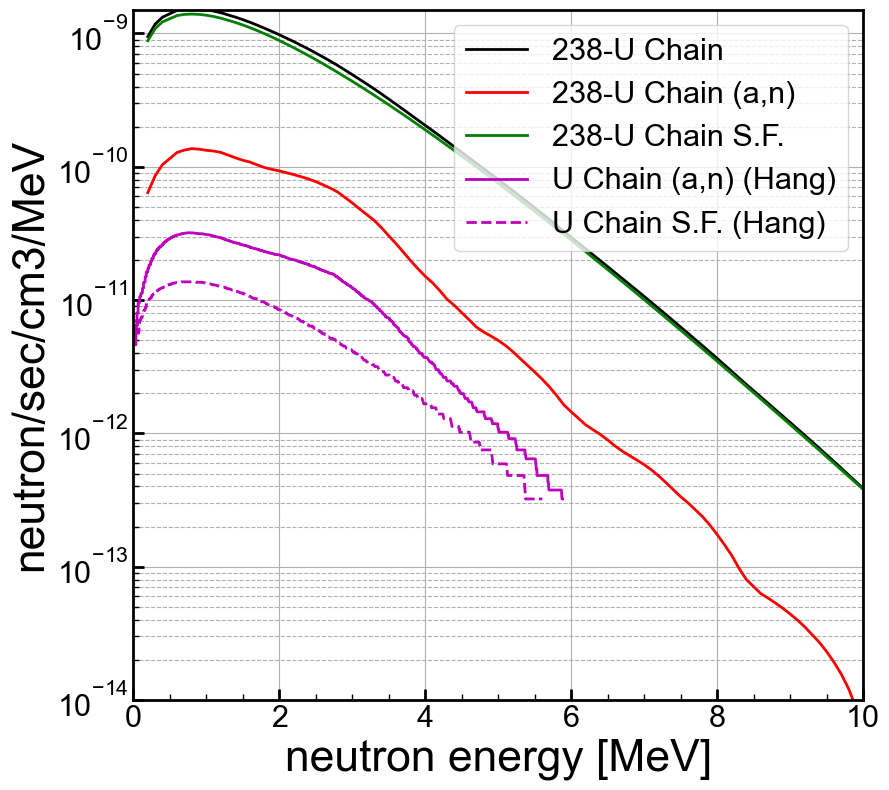

In [9]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


width=np.abs(np.diff(u238chainEn)[0])
      


ax1.plot(u238chainEn, u238chainRn/width,color='k',linestyle='-',label="238-U Chain")
ax1.plot(u238chainEn, u238chainANRn/width,color='r',linestyle='-',label="238-U Chain (a,n)")
ax1.plot(u238chainEn, u238chainSFRn/width,color='g',linestyle='-',label="238-U Chain S.F.")
ax1.plot(uANhangEn, uANhangRn,color='m',linestyle='-',label="U Chain (a,n) (Hang)")
ax1.plot(uSFhangEn, uSFhangRn,color='m',linestyle='--',label="U Chain S.F. (Hang)")


#ax1.plot(Eplot, 100*er_res(Eplot),color='b',label="$\sigma$ (n,p) (%)")


ymin = 1e-14
ymax = 1.5e-9


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 10) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('neutron/sec/cm3/MeV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

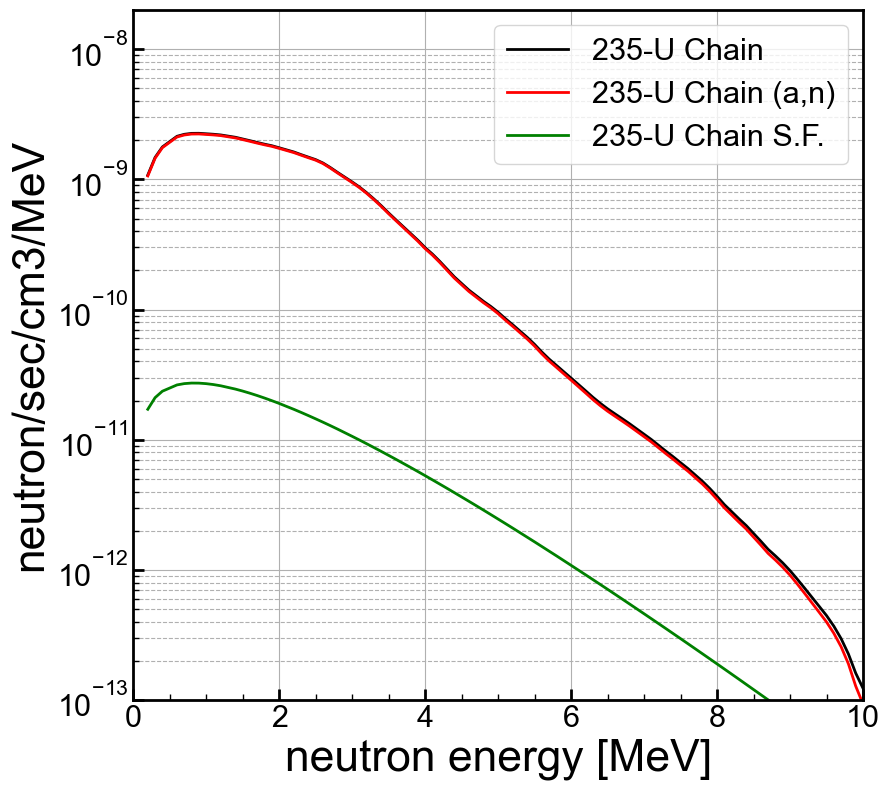

In [10]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

width=np.abs(np.diff(u235chainEn)[0])



ax1.plot(u235chainEn, u235chainRn/width,color='k',linestyle='-',label="235-U Chain")
ax1.plot(u235chainEn, u235chainANRn/width,color='r',linestyle='-',label="235-U Chain (a,n)")
ax1.plot(u235chainEn, u235chainSFRn/width,color='g',linestyle='-',label="235-U Chain S.F.")



#ax1.plot(Eplot, 100*er_res(Eplot),color='b',label="$\sigma$ (n,p) (%)")


ymin = 1e-13
ymax = 2e-8


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 10) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('neutron/sec/cm3/MeV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()